# NYC restaurants inspection - Data Challenge
Sarah Atwi, 20/02/2020

In [1]:
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import datacompy


In [5]:
#read in inspection results
results0 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_1_of_6.txt', delimiter=',')
results1 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_2_of_6.txt', delimiter=',')
results2 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_3_of_6.txt', delimiter=',')
results3 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_5_of_6.txt', delimiter=',')
results4 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_6_of_6.txt', delimiter=',')

resultslist=[results0, results1, results2, results3, results4]


In [6]:
results1.shape
results1.dtypes


Unnamed: 0                 int64
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [8]:
#explore results data structure
for resultnumber in resultslist :
    print((resultnumber).columns) 

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCO

In [9]:
results=pd.concat(resultslist)

In [10]:
#look at the data
print(results.shape)

(333265, 19)


In [338]:
results.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [339]:
results[['SCORE']]

,SCORE
0,30.0
1,NaN
2,2.0
3,46.0
4,18.0
...,...
66648,19.0
66649,11.0
66650,25.0
66651,12.0


In [12]:
results[['SCORE']].isnull().sum(axis = 0)

SCORE    19294
dtype: int64

In [13]:
results_subset = results[['BORO','CUISINE DESCRIPTION','SCORE']].copy()

In [14]:
print(results_subset.shape)
print(results_subset.columns)
results_subset

(333265, 3)
Index(['BORO', 'CUISINE DESCRIPTION', 'SCORE'], dtype='object')


,BORO,CUISINE DESCRIPTION,SCORE
0,MANHATTAN,Italian,30.0
1,MANHATTAN,Italian,NaN
2,QUEENS,Italian,2.0
3,STATEN ISLAND,Chinese,46.0
4,BROOKLYN,American,18.0
...,...,...,...
66648,MANHATTAN,Jewish/Kosher,19.0
66649,MANHATTAN,American,11.0
66650,MANHATTAN,Japanese,25.0
66651,STATEN ISLAND,American,12.0


In [15]:
#checking for any NA values to be cleaned
print(results_subset.isnull().values.any())
print(results_subset.isnull().sum().sum())

True
19294


In [16]:
results_subset.head

<bound method NDFrame.head of                 BORO CUISINE DESCRIPTION  SCORE
0          MANHATTAN             Italian   30.0
1          MANHATTAN             Italian    NaN
2             QUEENS             Italian    2.0
3      STATEN ISLAND             Chinese   46.0
4           BROOKLYN            American   18.0
...              ...                 ...    ...
66648      MANHATTAN       Jewish/Kosher   19.0
66649      MANHATTAN            American   11.0
66650      MANHATTAN            Japanese   25.0
66651  STATEN ISLAND            American   12.0
66652       BROOKLYN              Donuts    9.0

[333265 rows x 3 columns]>

In [17]:
#I think NaNs are only in the score
results_clean=results_subset.dropna(subset=['SCORE'])

In [18]:
#CHecking if that was right, should spit out "False"
results_clean.isnull().values.any()
#lost about 20k rows ~6%, which we can afford

False

In [19]:
#Because there are objects, this will help encode names into integers for processing later
results_clean.dtypes

BORO                    object
CUISINE DESCRIPTION     object
SCORE                  float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A349691978>,
      dtype=object)

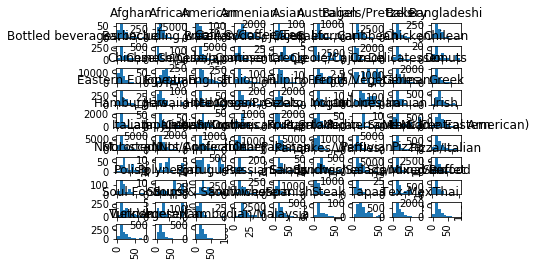

In [31]:
#results_clean['SCORE'].hist(by=results_clean['BORO'])
results_clean['SCORE'].hist(by=results_clean['CUISINE DESCRIPTION'])

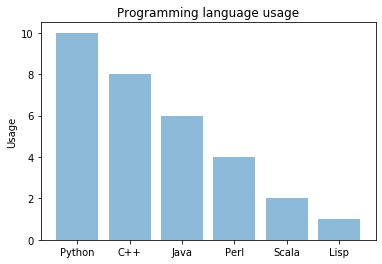

In [23]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

pyplot.bar(y_pos, performance, align='center', alpha=0.5)
pyplot.xticks(y_pos, objects)
pyplot.ylabel('Usage')
pyplot.title('Programming language usage')

pyplot.show()

In [365]:
X = array[:,0:2]
Y = array[:,2]

In [366]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

Next step will be to try multiple different models, both linear and nonlinear to predict the score.

In [367]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.398318 (0.000000)
LDA: 0.398318 (0.000000)
KNN: 0.400803 (0.003169)
CART: 0.466191 (0.000080)
NB: 0.397518 (0.000569)


KeyboardInterrupt: 

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()